In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data

,MATS3v,nHBint10,MATS3s,MATS3p,nHBDon_Lipinski,minHBint8,MATS3e,MATS3c,minHBint2,MATS3m,...,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,SHdNH,ETA_dEpsilon_C,MDEO-22,Class
0,0.0908,0,0.0075,0.0173,0,0.0,-0.0436,0.0409,0.0,0.1368,...,0.0000,0.0000,0.1780,1.5488,0.0088,0,0.0,-0.0868,0.00,NoChanger
1,0.0213,0,0.1144,-0.0410,0,0.0,0.1231,-0.0316,0.0,0.1318,...,8.8660,19.3525,0.1739,1.3718,0.0048,2,0.0,-0.0810,0.25,NoChanger
2,0.0018,0,-0.0156,-0.0765,2,0.0,-0.1138,-0.1791,0.0,0.0615,...,5.2267,27.8796,0.1688,1.4395,0.0116,2,0.0,-0.1004,0.00,NoChanger
3,-0.0251,0,-0.0064,-0.0894,3,0.0,-0.0747,-0.1151,0.0,0.0361,...,7.7896,24.7336,0.1702,1.4654,0.0133,2,0.0,-0.1010,0.00,NoChanger
4,-0.0094,0,0.0132,-0.1035,0,0.0,-0.0046,-0.0870,0.0,0.1063,...,13.0472,7.0536,0.1785,1.4507,0.0113,2,0.0,-0.0824,0.00,NoChanger
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-0.0960,0,-0.1131,-0.1086,1,0.0,-0.1250,0.0780,0.0,-0.2306,...,7.3247,6.9480,0.2213,1.0273,0.0172,2,0.0,-0.0812,0.00,Changer
86,-0.0944,0,-0.1736,-0.0182,0,0.0,-0.1476,0.0740,0.0,-0.2555,...,10.3324,6.9480,0.2003,1.1096,0.0172,2,0.0,-0.0960,0.00,Changer
87,-0.0868,0,-0.1118,-0.0858,1,0.0,-0.1440,0.0856,0.0,-0.1059,...,7.3260,6.9515,0.2277,1.0040,0.0203,2,0.0,-0.0886,0.00,Changer
88,-0.0146,0,-0.0783,-0.0251,1,0.0,-0.0518,0.0775,0.0,-0.1078,...,7.3308,6.9642,0.2430,1.0660,0.0154,2,0.0,-0.0570,0.00,Changer


In [4]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [5]:
classes = {
    'NoChanger' : 0,
    'Changer' : 1
}

y = y.replace(classes)

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Izdvajanje top 10 atributa koristeći RFE i DecisionTreeClassifier
estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=8, step=1)
selector.fit(X_scaled, y)
top8_indices_rfe = selector.get_support(indices=True)
top8_attributes_rfe = X.columns[top8_indices_rfe].tolist()
print('Top 8 atributa po RFE i DecisionTreeClassifier-u:', top8_attributes_rfe)

Top 8 atributa po RFE i DecisionTreeClassifier-u: ['ETA_Eta_F_L', 'ATS8m', 'AATS4s', 'MATS4e', 'GATS7m', 'SsOm', 'AATSC4m', 'SHBint10']


In [8]:
# Stvaranje novog dataseta sa izdvojenim atributima iz RFE pristupa
X_scaled_selected = X_scaled[:, top8_indices_rfe]

X_scaled_np = np.array(X_scaled_selected)
y_np = np.array(y)

# Spajanje X_scaled i y
combined_data_new = np.concatenate((X_scaled_np, y_np.reshape(-1, 1)), axis=1)

# Pretvaranje spojenog numpy array-a u pandas DataFrame
data_new = pd.DataFrame(combined_data_new, columns=list(top8_attributes_rfe) + ['Class'])

In [9]:
data_new

,ETA_Eta_F_L,ATS8m,AATS4s,MATS4e,GATS7m,SsOm,AATSC4m,SHBint10,Class
0,1.920211,1.325867,0.956639,-1.116517,-0.091504,-0.277042,-0.113817,-0.245526,0.0
1,1.562127,0.659840,0.144122,1.749548,0.398228,-0.277042,1.244328,-0.245526,0.0
2,1.711121,-0.055565,1.052134,1.334794,1.416397,-0.277042,-0.528512,-0.245526,0.0
3,1.819668,0.325407,1.035449,1.033485,1.196017,-0.277042,-0.626789,-0.245526,0.0
4,1.461948,-0.246879,1.464361,-0.009297,0.583062,-0.277042,-0.107164,-0.245526,0.0
...,...,...,...,...,...,...,...,...,...
85,-2.376433,-1.147658,-1.020803,-0.789796,-1.189453,-0.277042,1.220688,-0.245526,1.0
86,-2.021199,-1.335065,-0.652796,-0.549294,-0.987241,-0.277042,0.367835,-0.245526,1.0
87,-2.385105,-0.079164,-1.032739,-0.877829,-0.108882,-0.277042,0.572457,-0.245526,1.0
88,-1.249363,0.735540,-1.380942,-0.352354,-0.108092,-0.277042,1.125632,-0.245526,1.0


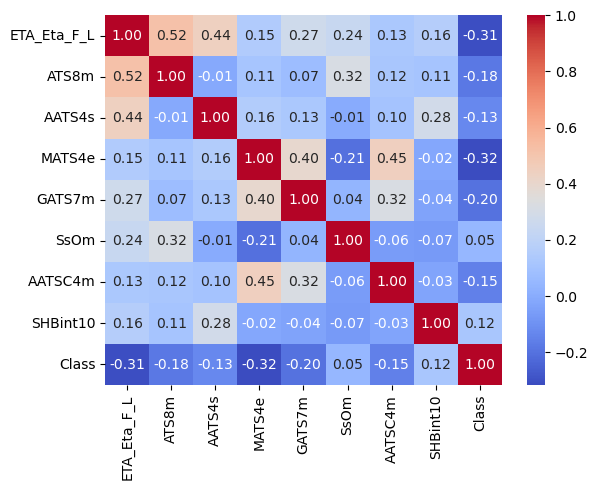

In [10]:
corr_matrix = data_new.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

In [11]:
X = data_new.drop('Class', axis = 1)
y = data_new[['Class']]

In [13]:
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X, y)

In [14]:
y_ros.value_counts()

Class
0.0      63
1.0      63
dtype: int64

In [15]:
X_ros_np = np.array(X_ros)
y_ros_np = np.array(y_ros)

# Spajanje X_ros i y_ros
combined_data = np.concatenate((X_ros_np, y_ros_np.reshape(-1, 1)), axis=1)

# Pretvaranje spojenog numpy array-a u pandas DataFrame
combined_df = pd.DataFrame(combined_data, columns=list(X.columns) + ['Class'])

In [16]:
combined_df

,ETA_Eta_F_L,ATS8m,AATS4s,MATS4e,GATS7m,SsOm,AATSC4m,SHBint10,Class
0,1.920211,1.325867,0.956639,-1.116517,-0.091504,-0.277042,-0.113817,-0.245526,0.0
1,1.562127,0.659840,0.144122,1.749548,0.398228,-0.277042,1.244328,-0.245526,0.0
2,1.711121,-0.055565,1.052134,1.334794,1.416397,-0.277042,-0.528512,-0.245526,0.0
3,1.819668,0.325407,1.035449,1.033485,1.196017,-0.277042,-0.626789,-0.245526,0.0
4,1.461948,-0.246879,1.464361,-0.009297,0.583062,-0.277042,-0.107164,-0.245526,0.0
...,...,...,...,...,...,...,...,...,...
121,-0.440839,0.869656,0.466823,-0.205330,-0.603354,-0.277042,-1.561746,1.852412,1.0
122,-0.387900,0.426253,-0.985942,-0.589226,-1.009357,-0.277042,-1.491391,-0.245526,1.0
123,-0.440839,0.869656,0.466823,-0.205330,-0.603354,-0.277042,-1.561746,1.852412,1.0
124,-0.507180,-1.443080,0.320597,-0.175380,0.319239,-0.277042,0.422087,-0.245526,1.0


In [17]:
# Cuvanje novog dataseta u CSV datoteku
combined_df.to_csv('rfe_dataset_8.csv', index=False)